# Laboratorio 5

## Integrantes

- Sergio Orellana 221122
- Rodrigo Mansilla 22611
- Carlos Valladares 221164

1. **¿Cuál es la característica más definitoria de una red libre de escala que la diferencia de una red aleatoria (Erdős-Rényi)? Explique por qué esta característica obliga a los modeladores a ir más allá de los modelos que se basan únicamente en propiedades promedio (como el modelo SIR clásico).**

En una red libre de escala, la distribución de grados sigue aproximadamente una ley de potencia: $P(k)\propto k^{-\gamma}$ para $k\ge k_{\min}$, lo que genera colas pesadas y la presencia de hubs (nodos con grado extremadamente alto). En un grafo aleatorio de Erdős–Rényi $G(n,p)$, el grado se concentra alrededor de la media (binomial que en el límite se aproxima a Poisson), por lo que no aparecen colas pesadas comparables. Esta heterogeneidad hace que los promedios (como el grado medio $\langle k\rangle$) no describan bien la dinámica de propagación: cantidades como el segundo momento $\langle k^2\rangle$ controlan los umbrales epidémicos y la intensidad de la transmisión. Por eso voy más allá del SIR de mezcla homogénea (basado en una tasa promedio de contactos) e incorporo explícitamente la variabilidad de los grados y el rol de los hubs.

2. **Considere la fórmula de la ley de potencia vista en clase. ¿Qué implica un valor menor de gamma (por ejemplo, 2,1 frente a 3,5) sobre la prevalencia de nodos altamente conectados en la red?**

Con una distribución de grados de ley de potencia $P(k)\propto k^{-\gamma}$, un $\gamma$ menor implica una cola más pesada. Si observo $\gamma=2.1$ (frente a $\gamma=3.5$), es mucho más probable encontrar nodos altamente conectados (hubs). De hecho, para $2<\gamma\le 3$, en el límite de redes muy grandes la varianza puede divergir porque $\langle k^2\rangle$ crece muy rápido, lo que refuerza la abundancia e influencia de hubs. Con $\gamma$ más alto (por ejemplo, $3.5$), la cola decae más rápido y los hubs extremos son notablemente menos frecuentes.

3. **¿Por qué el número reproductivo básico R0 para una enfermedad que se propaga en una red libre de escala depende de la varianza de la distribución de grados, no solo de la media?**

En **redes heterogéneas**, el umbral epidémico y $R_0$ dependen de los **momentos** de la distribución de grados. Un resultado típico de **campo medio heterogéneo** liga $R_0$ con los dos primeros momentos:

$$
R_0 \propto \frac{\beta}{\mu}\,\frac{\langle k^2\rangle}{\langle k\rangle}
$$

donde $\beta$ es la tasa de transmisión y $\mu$ la tasa de recuperación. De forma equivalente, el **umbral** efectivo satisface aproximadamente:

$$
\lambda_c \sim \frac{\langle k\rangle}{\langle k^2\rangle}
$$

Así, a **mayor varianza** (y, por tanto, **mayor** $\langle k^2\rangle$), mayor será la razón $\langle k^2\rangle/\langle k\rangle$, lo que **eleva $R_0$** y facilita superar el umbral (o incluso que **desaparezca** en el límite grande cuando $\gamma \le 3$). Intuitivamente, los **hubs** concentran buena parte del potencial de transmisión; por eso $R_0$ no depende solo de $\langle k\rangle$ sino fuertemente de la **varianza**.


4. **¿Por qué las intervenciones dirigidas (por ejemplo, centrar las pruebas, el uso de mascarillas o la vacunación en los centros de la red) son particularmente eficaces y eficientes en una red sin escala en comparación con una red aleatoria? Explíquelo desde una perspectiva matemática y práctica.**

Desde la perspectiva matemática, en una red libre de escala los grados altos dominan el segundo momento $\langle k^2\rangle$. Si priorizo a los hubs (por ejemplo, con pruebas, mascarillas o vacunación focalizada), reduzco de manera abrupta $\langle k^2\rangle$. Como el umbral cumple aproximadamente $\lambda_c \sim \langle k\rangle/\langle k^2\rangle$, al disminuir $\langle k^2\rangle$ aumenta el umbral y disminuye $R_0$, frenando la propagación con menos recursos que una estrategia aleatoria.
Desde la práctica, identifico nodos centrales mediante centralidad de grado o centralidad de intermediación y concentro allí la intervención. En redes aleatorias (Erdős–Rényi), la distribución de grados es mucho más homogénea, de modo que “apuntar” a unos pocos nodos no reduce tanto $\langle k^2\rangle$ ni cambia dramáticamente la dinámica. En libres de escala, neutralizar unos pocos hubs altera el curso global de forma desproporcionadamente efectiva.

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Reproducibilidad
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)

def degree_array(G: nx.Graph) -> np.ndarray:
    return np.fromiter((d for _, d in G.degree()), dtype=int)

def integer_bins_from_degrees(deg: np.ndarray) -> np.ndarray:
    max_k = int(deg.max()) if deg.size else 0
    return np.arange(0, max_k + 2) - 0.5  # para centrar barras en enteros

# Estilo matplotlib
plt.rcParams.update({
    "figure.figsize": (10, 4),
    "axes.grid": True,
    "axes.spines.top": False,
    "axes.spines.right": False
})

print("Entorno listo")


Entorno listo


In [3]:
N = 1000       # número de nodos
m = 3          # cada nuevo nodo en BA se conecta a m existentes (≈ grado medio 2m)

# Red libre de escala (Barabási–Albert)
G_ba = nx.barabasi_albert_graph(n=N, m=m, seed=RANDOM_SEED)
deg_ba = degree_array(G_ba)
kbar_ba = deg_ba.mean()           # grado medio observado en BA

# Red aleatoria (Erdős–Rényi) con grado medio ~ kbar_ba
p = kbar_ba / (N - 1)             # E[k] ≈ p*(N-1) en ER
G_er = nx.erdos_renyi_graph(n=N, p=p, seed=RANDOM_SEED)
deg_er = degree_array(G_er)
kbar_er = deg_er.mean()

print(f"BA -> m={m}, grado medio observado ≈ {kbar_ba:.3f}")
print(f"ER -> p={p:.6f}, grado medio observado ≈ {kbar_er:.3f}")


BA -> m=3, grado medio observado ≈ 5.982
ER -> p=0.005988, grado medio observado ≈ 6.016


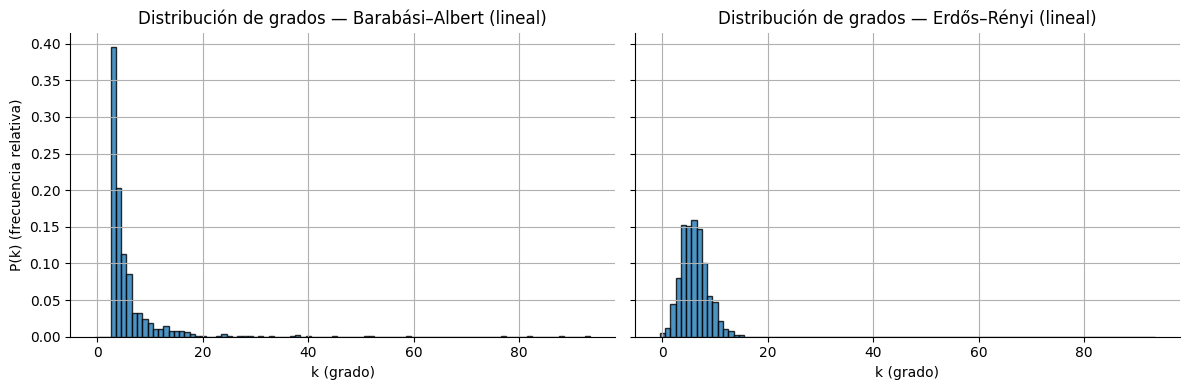

In [4]:
bins = integer_bins_from_degrees(np.concatenate([deg_ba, deg_er]))

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

# BA
axes[0].hist(deg_ba, bins=bins, density=True, edgecolor="black", alpha=0.8)
axes[0].set_title("Distribución de grados — Barabási–Albert (lineal)")
axes[0].set_xlabel("k (grado)")
axes[0].set_ylabel("P(k) (frecuencia relativa)")

# ER
axes[1].hist(deg_er, bins=bins, density=True, edgecolor="black", alpha=0.8)
axes[1].set_title("Distribución de grados — Erdős–Rényi (lineal)")
axes[1].set_xlabel("k (grado)")

plt.tight_layout()
plt.show()


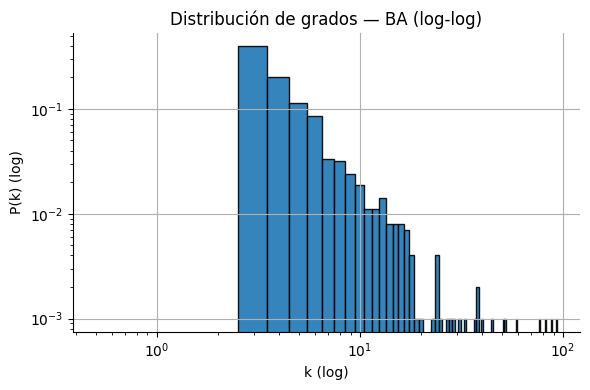

In [5]:
bins_ba = integer_bins_from_degrees(deg_ba)

plt.figure(figsize=(6, 4))
counts, edges, _ = plt.hist(deg_ba, bins=bins_ba, density=True, edgecolor="black", alpha=0.9)
plt.xscale("log")
plt.yscale("log")
plt.title("Distribución de grados — BA (log-log)")
plt.xlabel("k (log)")
plt.ylabel("P(k) (log)")
plt.tight_layout()
plt.show()

In [6]:
def resumen_grados(name, deg):
    return {
        "red": name,
        "nodos": deg.size,
        "grado_medio": float(np.mean(deg)),
        "varianza_grado": float(np.var(deg)),
        "grado_min": int(np.min(deg)),
        "grado_max": int(np.max(deg))
    }

res_ba = resumen_grados("Barabási–Albert", deg_ba)
res_er = resumen_grados("Erdős–Rényi", deg_er)

for r in (res_ba, res_er):
    print(r)

{'red': 'Barabási–Albert', 'nodos': 1000, 'grado_medio': 5.982, 'varianza_grado': 52.765676, 'grado_min': 3, 'grado_max': 93}
{'red': 'Erdős–Rényi', 'nodos': 1000, 'grado_medio': 6.016, 'varianza_grado': 6.229743999999999, 'grado_min': 0, 'grado_max': 15}


1) **Describe la marcada diferencia en la forma de los dos histogramas de escala lineal. ¿Qué te dice la forma de la distribución de la red sin escala sobre su estructura?**

Respuesta:
En BA observo un histograma muy sesgado con cola pesada: muchísimos nodos de grado pequeño y pocos hubs con grado muy alto (hasta $k_{\max}=93$). En ER la masa se concentra alrededor de la media (entre $\sim 4$ y $\sim 9$), con un rango mucho más corto y sin colas pronunciadas ($k_{\max}=15$).
La forma de BA me indica una heterogeneidad marcada y la presencia de hubs; esto es consistente con una distribución de grados tipo ley de potencia, $P(k)\propto k^{-\gamma}$, característica de redes libres de escala. En ER, el grado sigue una distribución binomial (que se aproxima a Poisson cuando $n$ es grande y $p$ es pequeño), por eso casi no aparecen hubs extremos.

2) **¿Qué revela el gráfico logarítmico de la distribución de grados de la red sin escala? ¿Qué confirma la línea de tendencia aproximadamente lineal?**

Respuesta:
En la gráfica log–log de BA la cola se alinea aproximadamente en una recta, lo que sugiere un comportamiento tipo ley de potencia. Esto confirma el carácter scale-free y es coherente con el mecanismo de attachment preferencial (rich-get-richer): los nuevos nodos se conectan con probabilidad proporcional al grado, reforzando a los hubs.

3) **Reporte la media y la varianza de cada red. ¿Cómo se comparan los valores de varianza? ¿Por qué esta diferencia es crucial para modelar procesos como la propagación de epidemias?**

Respuesta:

BA: $\bar{k}\approx 5.982$, $\mathrm{Var}(k)\approx 52.766$.

ER: $\bar{k}\approx 6.016$, $\mathrm{Var}(k)\approx 6.230$.

Aunque igualé las medias, la varianza en BA es muchísimo mayor por la cola pesada (hubs). En ER, al ser casi Poisson, media y varianza son del mismo orden (en Poisson, $E[K]=\mathrm{Var}(K)=\lambda$).
Esta diferencia es crítica para epidemias: mayor heterogeneidad implica umbrales epidémicos más bajos y potenciales super-diseminadores; por tanto, la transmisión puede sostenerse y expandirse más fácilmente en BA que en ER.

4) **Según tu análisis, si se introdujera un nuevo patógeno en cada una de estas redes sintéticas, ¿cuál tendría más probabilidades de causar una epidemia rápida y a gran escala? Explica por qué, haciendo referencia a la estructura de red que observaste.**

Respuesta:
La red BA tendría más probabilidades de generar una epidemia rápida y extensa. La presencia de hubs (altos $k$) conecta grandes porciones de la red y acorta distancias, reduciendo el umbral epidémico; en cambio, la red ER es más homogénea y requiere tasas de transmisión más altas para sostener el brote.

# Promt utilizado

Quiero que hagas un cuaderno de Python y organizado por bloques.

1) **Configuración del entorno**

- Importa y usa exclusivamente: networkx, numpy, matplotlib.
- Fija una semilla para reproducibilidad.

2) **Generación de redes**

- Crea una red Barabási–Albert con N = 1000 nodos. Elige un parámetro m adecuado (propón m=3 por defecto y justifícalo con la intuición de grado medio ≈ 2m).
- Calcula el grado medio observado de BA.
- Crea una red Erdős–Rényi con el mismo N y con p = k̄_BA/(N-1) para que el grado medio esperado coincida con BA (comparación justa).

3) **Visualización y análisis**

    - Dibuja dos histogramas de la distribución de grados (BA y ER) en escala lineal, con bins enteros comunes, lado a lado en una sola figura y con density=True.
    - Dibuja la distribución de grados de BA en escala logarítmica (ejes log–log) para inspeccionar la cola.
    - Calcula e imprime, para ambas redes: media, varianza, k_min, k_max.

# Referencias

- GeeksforGeeks. (2019, November 21). Network Centrality Measures in a Graph using Networkx | Python. GeeksforGeeks. https://www.geeksforgeeks.org/python/network-centrality-measures-in-a-graph-using-networkx-python/ 
- GeeksforGeeks. (2022a, May 17). Barabasi Albert Graph (for scale free models). GeeksforGeeks. https://www.geeksforgeeks.org/dsa/barabasi-albert-graph-scale-free-models/ 
- GeeksforGeeks. (2022b, July 21). Betweenness centrality (Centrality measure). GeeksforGeeks. https://www.geeksforgeeks.org/dsa/betweenness-centrality-centrality-measure/ 
- GeeksforGeeks. (2022c, July 25). Erdos Renyl Model (for generating Random Graphs). GeeksforGeeks. https://www.geeksforgeeks.org/dsa/erdos-renyl-model-generating-random-graphs/ 
- GeeksforGeeks. (2025a, July 15). Implementing Rich getting Richer phenomenon using Barabasi Albert Model in Python. GeeksforGeeks. https://www.geeksforgeeks.org/python/implementing-rich-getting-richer-phenomenon-using-barabasi-albert-model-in-python/ 
- GeeksforGeeks. (2025b, September 15). Graph Theory Tutorial. GeeksforGeeks. https://www.geeksforgeeks.org/dsa/graph-theory-tutorial/
- GeeksforGeeks. (2025a, July 23). Difference between binomial and poisson distribution. GeeksforGeeks. https://www.geeksforgeeks.org/maths/difference-between-binomial-and-poisson-distribution/ 
- GeeksforGeeks. (2025b, July 24). Poisson Distribution | Definition, Formula, Table and Examples. GeeksforGeeks. https://www.geeksforgeeks.org/maths/poisson-distribution/